In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

### Funzioni utili

In [76]:
root_path = r'Dati/Parte 2/Caratterizzazione_impulso/'
skip = 18

def read_data(filename, titles = ['Time', 'V']):
    df = read_corretto(root_path + filename, skip, titles)

    # Sostituire tutte le istanze di "," con "" nelle colonne: 'V', 'Time'
    df['V'] = df['V'].str.replace(",", "", case=False, regex=False)
    df['Time'] = df['Time'].str.replace(",", "", case=False, regex=False)

    # Converte le colonne in float
    df = df.astype(float)

    return df

def _crop_df(df, N, thr):
    df = crop_df(df, N, thr)
    df.index = np.arange(len(df))
    return df


def quick_plot(df):
    plt.plot(df['Time'], df['V'])
    plt.xlabel('Time')
    plt.ylabel('V')
    plt.title('Signal')
    plt.show()

def find_max(df):
    max_index = df['V'].idxmax()
    max_value = df['V'][max_index]

    return max_index, max_value

def exp_dec(x, a, b, c):
    return a * np.exp(-b * x) + c

def exp_cre(x, a, b, c):
    return a * (1 - np.exp(-b * x)) + c

def rise_fall(df):
    max_index, _ = find_max(df)

    rise_time = df['Time'][:max_index]
    fall_time = df['Time'][max_index:]
    rise_voltage = df['V'][:max_index]
    fall_voltage = df['V'][max_index:]

    rise = pd.DataFrame({'Time': rise_time, 'V': rise_voltage})
    fall = pd.DataFrame({'Time': fall_time, 'V': fall_voltage})
    return rise, fall



## BGO

In [ ]:
def log(x, a, b, x0):
    return a * np.log(x-x0) + b

def pol3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def composto(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c * (1 - np.exp(-d * x)) + e

### Na

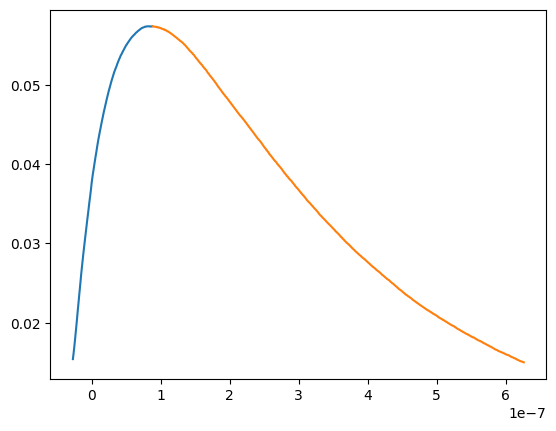

In [86]:
bgo_na = pd.read_csv(root_path + 'BGO_Na22.CSV')
bgo_na = _crop_df(bgo_na, 10, .015)

bgo_na_rise, bgo_na_fall = rise_fall(bgo_na)
bgo_na_ers1 = [0.001] * len(bgo_na_rise)
bgo_na_ers2 = [0.001] * len(bgo_na_fall)

plt.plot(bgo_na_rise['Time'], bgo_na_rise['V'], label='Rise')
plt.plot(bgo_na_fall['Time'], bgo_na_fall['V'], label='Fall')
plt.show()

In [83]:
pars1, vals1, ers1, *other1 = LS_fit(bgo_na_rise['Time'], bgo_na_rise['V'], bgo_na_ers1, exp_cre, 
                                            #limits = [['a', (0, 1)], ['b', (10_0000, None)]],
                                            a=.0035, b=21e6, c=0) # era solo un problema di inizializzazione

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.05 (χ²/ndof = 0.2)      │              Nfcn = 161              │
│ EDM = 5.82e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  22.7e-3  │  0.4e-3   │            │            │         │         │       │
│ 1 │ b    │  26.9e6   │   0.6e6   │            │            │         │         │       │
│ 2 │ c    │ 37.77e-3  │  0.15e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             a             b             c │
├───┼───────────────────────────────────────────┤
│ a │       1.8e-07 -233.66828557     -0.050e-6 │
│ b │ -233.66828557      3.64e+11  60.596280309 │
│ c │     -0.050e-6  60.596280309      2.25e-08 │
└───┴───────────────────────────────────────────┘

In [62]:
pars2, vals2, ers2, *other2 = LS_fit(bgo_na_fall['Time'], bgo_na_fall['V'], bgo_na_ers2, exp_dec, a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 289.7 (χ²/ndof = 0.5)      │              Nfcn = 700              │
│ EDM = 3.79e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  87.5e-3  │  0.9e-3   │            │            │         │         │       │
│ 1 │ b    │  1.84e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ c    │  -0.0137  │  0.0012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    8.64e-07 -40.5976988     -1.1e-6 │
│ b │ -40.5976988     2.1e+09  53.0029820 │
│ c │     -1.1e-6  53.0029820    1.36e-06 │
└───┴─────────────────────────────────────┘

In [85]:
# parsx, valsx, ersx, *otherx = LS_fit(bgo_na['Time'], bgo_na['V'], [.001 for _ in bgo_na['Time']], composto,
#                                      a=.0035, b=1e6, c=.0035, d=2e7, e=0.01)

### Co

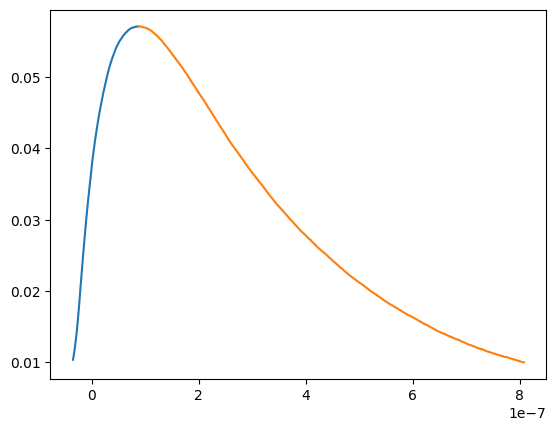

In [89]:
bgo_co = pd.read_csv(root_path + 'BGO_Co60.CSV')
bgo_co = _crop_df(bgo_co, 10, .01)

bgo_co_rise, bgo_co_fall = rise_fall(bgo_co)
bgo_co_ers1 = [0.001] * len(bgo_co_rise)
bgo_co_ers2 = [0.001] * len(bgo_co_fall)

plt.plot(bgo_co_rise['Time'], bgo_co_rise['V'], label='Rise')
plt.plot(bgo_co_fall['Time'], bgo_co_fall['V'], label='Fall')
plt.show()

In [109]:
pars3, vals3, ers3, *other3 = LS_fit(bgo_co_rise['Time'], bgo_co_rise['V'], bgo_co_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars4, vals4, ers4, *other4 = LS_fit(bgo_co_fall['Time'], bgo_co_fall['V'], bgo_co_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 100.8 (χ²/ndof = 0.8)      │              Nfcn = 139              │
│ EDM = 3.02e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  24.0e-3  │  0.4e-3   │            │            │         │         │       │
│ 1 │ b    │  23.8e6   │   0.5e6   │            │            │         │         │       │
│ 2 │ c    │ 37.51e-3  │  0.14e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             a             b             c │
├───┼───────────────────────────────────────────┤
│ a │      1.93e-07 -187.70534686     -0.049e-6 │
│ b │ -187.70534686      2.07e+11  48.079204499 │
│ c │     -0.049e-6  48.079204499      2.07e-08 │
└───┴───────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 421.3 (χ²/ndof = 0.6)      │              Nfcn = 603              │
│ EDM = 5.55e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 78.76e-3  │  0.25e-3  │            │            │         │         │       │
│ 1 │ b    │  2.289e6  │  0.028e6  │            │            │         │         │       │
│ 2 │ c    │  -3.3e-3  │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    6.08e-08 -4.07576888    -0.07e-6 │
│ b │ -4.07576888    7.89e+08 10.42837335 │
│ c │    -0.07e-6 10.42837335    1.46e-07 │
└───┴─────────────────────────────────────┘

## CSI

### Na

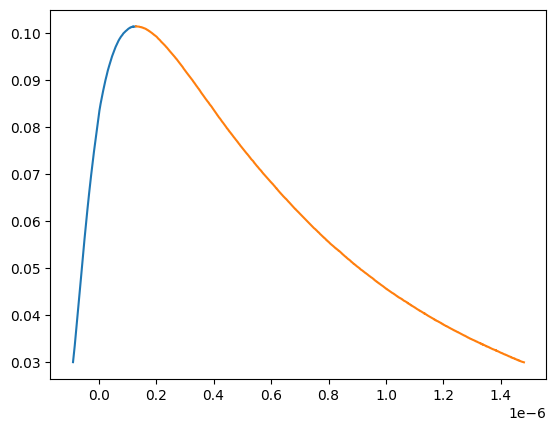

In [104]:
csi_na = pd.read_csv(root_path + 'CSI_Na22.CSV')
csi_na = _crop_df(csi_na, 10, .03)

csi_na_rise, csi_na_fall = rise_fall(csi_na)
csi_na_ers1 = [0.001] * len(csi_na_rise)
csi_na_ers2 = [0.001] * len(csi_na_fall)

plt.plot(csi_na_rise['Time'], csi_na_rise['V'], label='Rise')
plt.plot(csi_na_fall['Time'], csi_na_fall['V'], label='Fall')
plt.show()

In [105]:
pars5, vals5, ers5, *other5 = LS_fit(csi_na_rise['Time'], csi_na_rise['V'], csi_na_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars6, vals6, ers6, *other6 = LS_fit(csi_na_fall['Time'], csi_na_fall['V'], csi_na_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 407.5 (χ²/ndof = 1.9)      │              Nfcn = 122              │
│ EDM = 5.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 28.30e-3  │  0.35e-3  │            │            │         │         │       │
│ 1 │ b    │  12.26e6  │  0.12e6   │            │            │         │         │       │
│ 2 │ c    │ 81.35e-3  │  0.10e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     1.24e-07 -42.09752774       -25e-9 │
│ b │ -42.09752774     1.53e+10  9.086563746 │
│ c │       -25e-9  9.086563746     9.99e-09 │
└───┴────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1194 (χ²/ndof = 0.9)       │              Nfcn = 558              │
│ EDM = 2.62e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 122.6e-3  │  0.4e-3   │            │            │         │         │       │
│ 1 │ b    │   926e3   │    7e3    │            │            │         │         │       │
│ 2 │ c    │  -2.2e-3  │  0.5e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    1.36e-07 -2.40989681    -0.17e-6 │
│ b │ -2.40989681     5.1e+07  3.33337747 │
│ c │    -0.17e-6  3.33337747    2.24e-07 │
└───┴─────────────────────────────────────┘

### Co

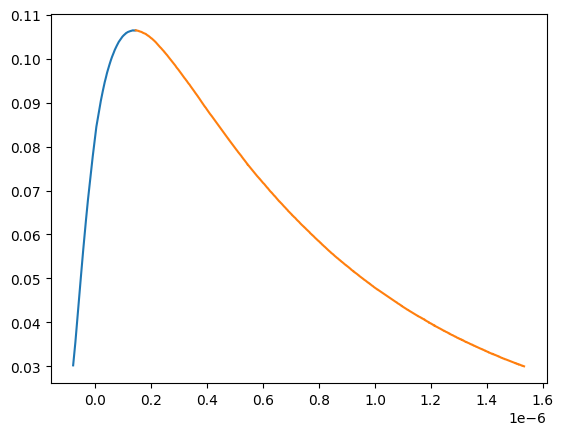

In [110]:
csi_co = pd.read_csv(root_path+'CSI_Co60.CSV')
csi_co = _crop_df(csi_co, 10, .03)

csi_co_rise, csi_co_fall = rise_fall(csi_co)
csi_co_ers1 = [0.001] * len(csi_co_rise)
csi_co_ers2 = [0.001] * len(csi_co_fall)

plt.plot(csi_co_rise['Time'], csi_co_rise['V'], label='Rise')
plt.plot(csi_co_fall['Time'], csi_co_fall['V'], label='Fall')
plt.show()

In [111]:
pars7, vals7, ers7, *other7 = LS_fit(csi_co_rise['Time'], csi_co_rise['V'], csi_co_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars8, vals8, ers8, *other8 = LS_fit(csi_co_fall['Time'], csi_co_fall['V'], csi_co_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 397.1 (χ²/ndof = 1.8)      │              Nfcn = 141              │
│ EDM = 5.19e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 31.65e-3  │  0.32e-3  │            │            │         │         │       │
│ 1 │ b    │  13.00e6  │  0.12e6   │            │            │         │         │       │
│ 2 │ c    │ 82.08e-3  │  0.10e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     1.03e-07 -35.76696512    -0.025e-6 │
│ b │ -35.76696512     1.35e+10  9.142751510 │
│ c │    -0.025e-6  9.142751510     1.07e-08 │
└───┴────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1202 (χ²/ndof = 0.9)       │              Nfcn = 529              │
│ EDM = 1.3e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 128.20e-3 │  0.29e-3  │            │            │         │         │       │
│ 1 │ b    │   978e3   │    7e3    │            │            │         │         │       │
│ 2 │ c    │  0.3e-3   │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    8.67e-08 -1.66066442    -0.11e-6 │
│ b │ -1.66066442    4.22e+07  2.55430422 │
│ c │    -0.11e-6  2.55430422     1.6e-07 │
└───┴─────────────────────────────────────┘

## Lyso

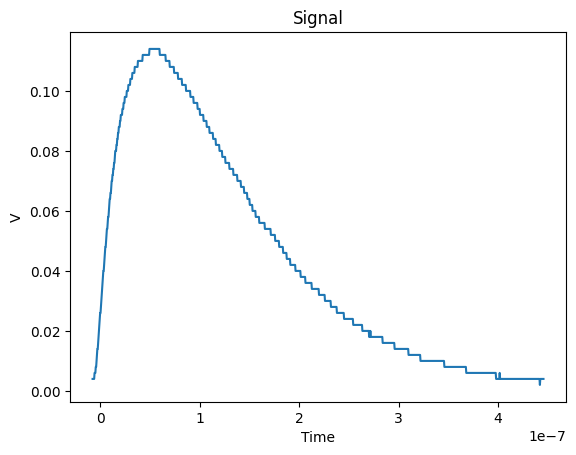

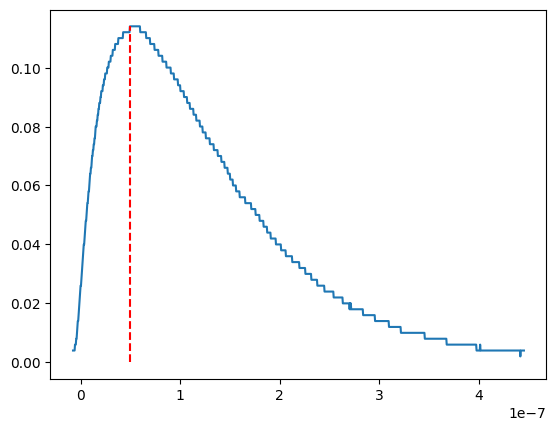

In [107]:
lyso = read_data('LySO/dat.CSV')
lyso = crop_df(lyso, 10, .002)
#lyso_rise, lyso_fall = rise_fall(lyso)
quick_plot(lyso)

lyso_ers = [.002] * len(lyso['Time'])

max_index_lyso, max_lyso = find_max(lyso)

plt.plot(lyso['Time'], lyso['V'])
plt.vlines(lyso['Time'][max_index_lyso], 0, max_lyso, color='r', linestyle='--')
plt.show()

In [108]:
# descend fit
pars_lyso, vals_lyso, ers_lyso, *other_lyso = LS_fit(lyso['Time'][max_index_lyso:], lyso['V'][max_index_lyso:], lyso_ers[max_index_lyso:], expon, a=1, b=1)

NameError: name 'expon' is not defined

In [ ]:

plt.plot(lyso_fall['Time'], lyso_fall['V'])